In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [51]:
def clean_columns(df):
    new_column = []
    for column in df.columns:
        if "__MIN" in column or "__MAX" in column or "Step" in column:
            df = df.drop([column], axis=1)
        else:
            new_column.append(column.split()[0])
    df.columns = new_column
    return df

def bert_roberta(df):
    df_new = df.copy()
    df_old = df.copy()
    for column in df.columns:
        words = column.split()
        if "roberta" in words[0]:
            df_old = df_old.drop([column], axis=1)
        elif "bert" in words[0]:
            df_new = df_new.drop([column], axis=1)
    
    return df_old, df_new

def orig_new(df):
    df_new = df.copy()
    df_old = df.copy()
    for column in df.columns:
        words = column.split()
        if "new" in words[0]:
            df_old = df_old.drop([column], axis=1)
        elif "orig" in words[0]:
            df_new = df_new.drop([column], axis=1)
    
    return df_old, df_new

def create_figure(dflist, ylabel, save_path):

    fig, ax = plt.subplots(figsize=(5, 5))
    for df in dflist:
        for name in df.columns:
            _name = " ".join(name.split("_")[:-1])

            ax.plot(range(50), df[name], label=_name)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2)
    ax.set_xlabel("Epochs",fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    fig.savefig(save_path, format="svg", bbox_inches='tight')

In [39]:
b_test_acc = pd.read_csv("./bert_test_acc.csv")
b_train_acc = pd.read_csv("./bert_train_acc.csv")
b_train_loss = pd.read_csv("./bert_train_loss.csv")

b_gcn_test_acc = pd.read_csv("./bert_gcn_test_acc.csv")
b_gcn_train_acc = pd.read_csv("./bert_gcn_train_acc.csv")
b_gcn_train_loss = pd.read_csv("./bert_gcn_train_loss.csv")
rb_gcn_test_acc = pd.read_csv("./roberta_gcn_test_acc.csv")
rb_gcn_train_acc = pd.read_csv("./roberta_gcn_train_acc.csv")
rb_gcn_train_loss = pd.read_csv("./roberta_gcn_train_loss.csv")


In [40]:
b_test_acc = clean_columns(b_test_acc)
b_train_acc = clean_columns(b_train_acc)
b_train_loss = clean_columns(b_train_loss)
b_test_acc, rb_test_acc = bert_roberta(b_test_acc)
b_train_acc, rb_train_acc = bert_roberta(b_train_acc)
b_train_loss, rb_train_loss = bert_roberta(b_train_loss)

b_orig_test_acc, b_new_test_acc  = orig_new(b_test_acc)
b_orig_train_acc, b_new_train_acc = orig_new(b_train_acc)
b_orig_train_loss, b_new_train_loss = orig_new(b_train_loss)
rb_orig_test_acc, rb_new_test_acc = orig_new(rb_test_acc)
rb_orig_train_acc, rb_new_train_acc = orig_new(rb_train_acc)
rb_orig_train_loss, rb_new_train_loss = orig_new(rb_train_loss)

b_gcn_test_acc = clean_columns(b_gcn_test_acc)
b_gcn_train_acc = clean_columns(b_gcn_train_acc)
b_gcn_train_loss = clean_columns(b_gcn_train_loss)
rb_gcn_test_acc = clean_columns(rb_gcn_test_acc)
rb_gcn_train_acc = clean_columns(rb_gcn_train_acc)
rb_gcn_train_loss = clean_columns(rb_gcn_train_loss)

b_gcn_orig_test_acc, b_gcn_new_test_acc  = orig_new(b_gcn_test_acc)
b_gcn_orig_train_acc, b_gcn_new_train_acc = orig_new(b_gcn_train_acc)
b_gcn_orig_train_loss, b_gcn_new_train_loss = orig_new(b_gcn_train_loss)
rb_gcn_orig_test_acc, rb_gcn_new_test_acc = orig_new(rb_gcn_test_acc)
rb_gcn_orig_train_acc, rb_gcn_new_train_acc = orig_new(rb_gcn_train_acc)
rb_gcn_orig_train_loss, rb_gcn_new_train_loss = orig_new(rb_gcn_train_loss)


In [41]:
b_orig_test_acc    = [b_orig_test_acc, b_gcn_orig_test_acc]
b_orig_train_acc   = [b_orig_train_acc, b_gcn_orig_train_acc]
b_orig_train_loss  = [b_orig_train_loss, b_gcn_orig_train_loss]
b_new_test_acc     = [b_new_test_acc, b_gcn_new_test_acc]
b_new_train_acc    = [b_new_train_acc, b_gcn_new_train_acc]
b_new_train_loss   = [b_new_train_loss, b_gcn_new_train_loss]
rb_orig_test_acc    = [rb_orig_test_acc, rb_gcn_orig_test_acc]
rb_orig_train_acc   = [rb_orig_train_acc, rb_gcn_orig_train_acc]
rb_orig_train_loss  = [rb_orig_train_loss, rb_gcn_orig_train_loss]
rb_new_test_acc     = [rb_new_test_acc, rb_gcn_new_test_acc]
rb_new_train_acc    = [rb_new_train_acc, rb_gcn_new_train_acc]
rb_new_train_loss   = [rb_new_train_loss, rb_gcn_new_train_loss]


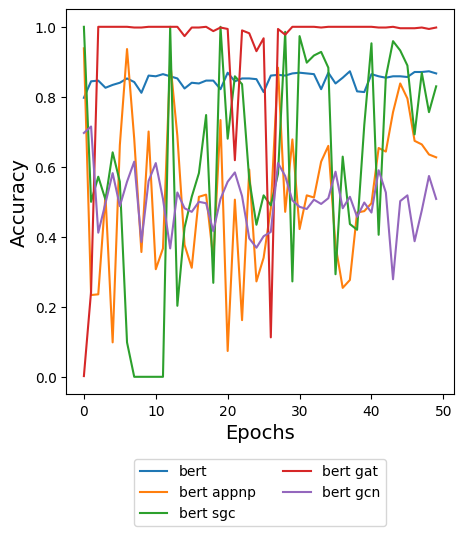

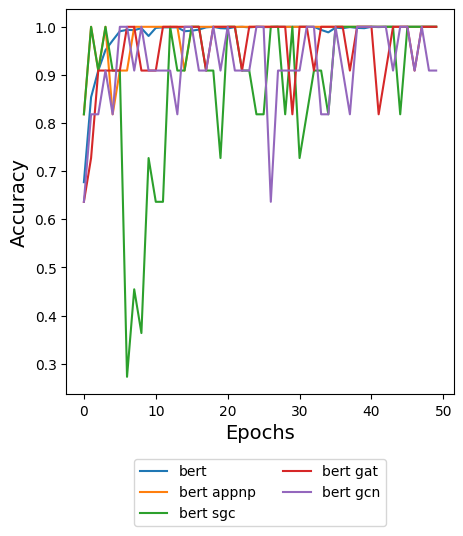

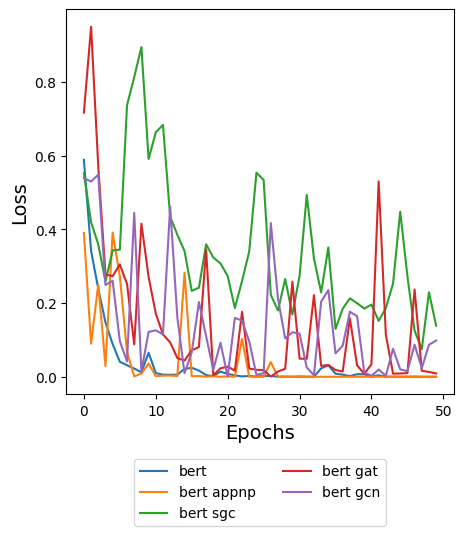

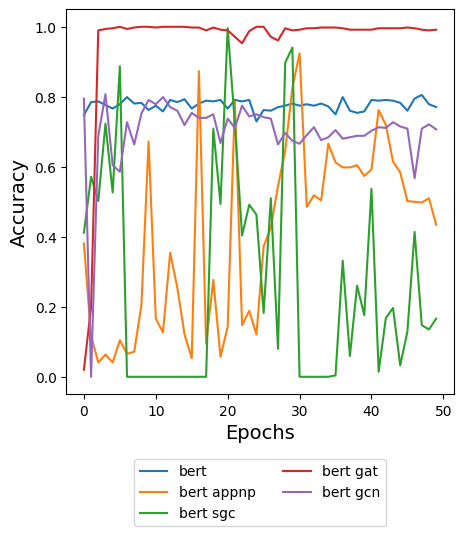

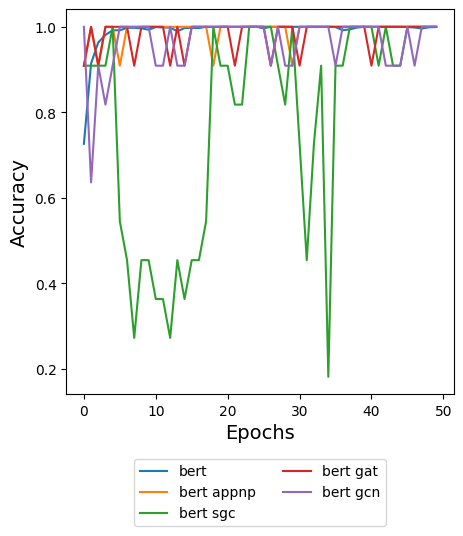

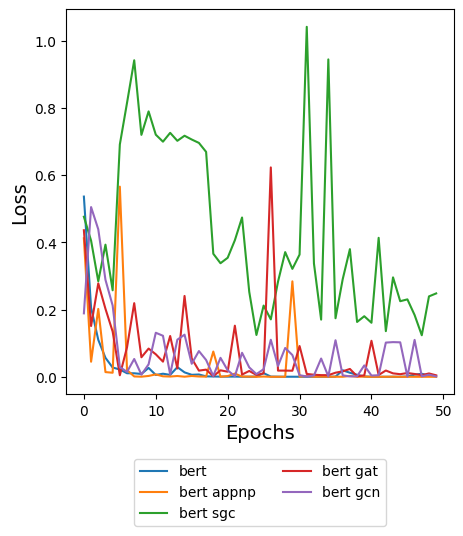

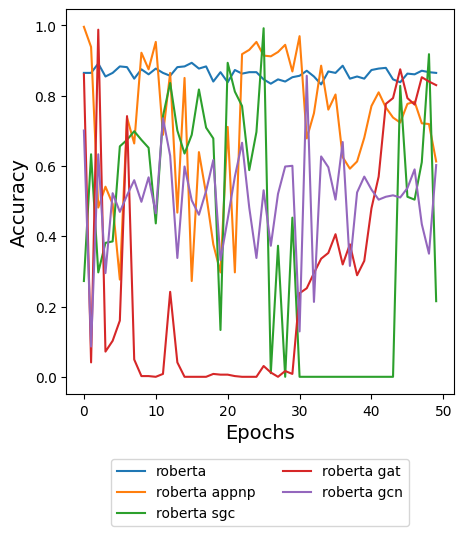

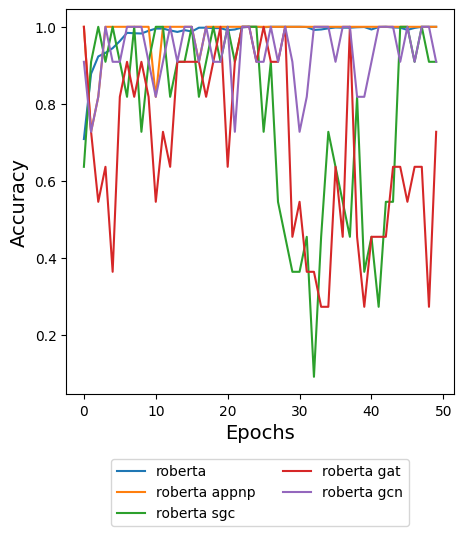

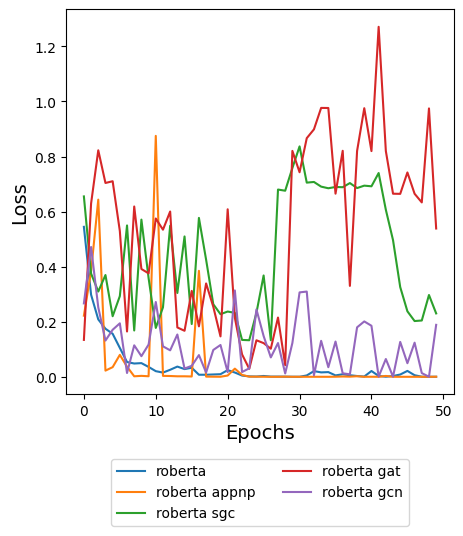

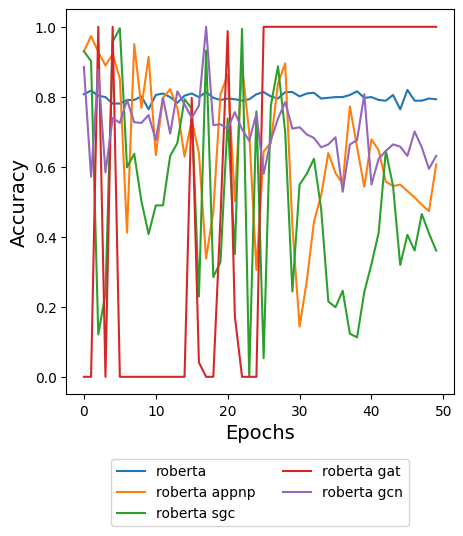

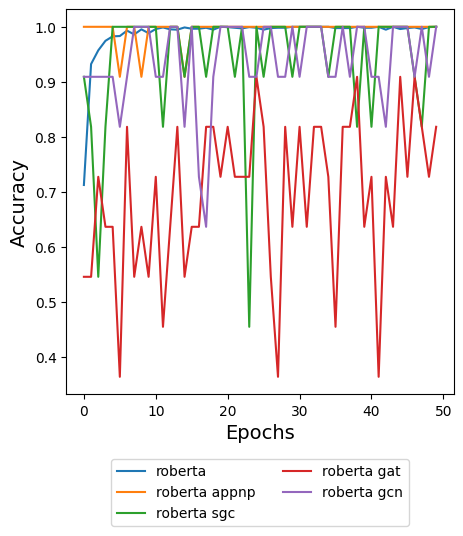

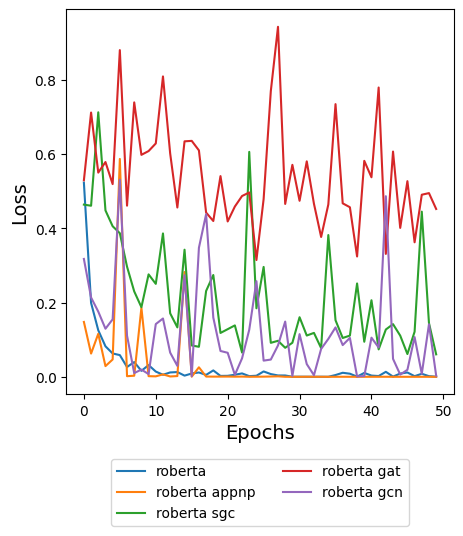

In [52]:
create_figure(b_orig_test_acc, "Accuracy", "./b_orig_test_acc.svg")
create_figure(b_orig_train_acc, "Accuracy", "./b_orig_train_acc.svg")
create_figure(b_orig_train_loss, "Loss", "./b_orig_train_loss.svg")
create_figure(b_new_test_acc, "Accuracy", "./b_new_test_acc.svg")
create_figure(b_new_train_acc, "Accuracy", "./b_new_train_acc.svg")
create_figure(b_new_train_loss, "Loss", "./b_new_train_loss.svg")
create_figure(rb_orig_test_acc, "Accuracy", "./rb_orig_test_acc.svg")
create_figure(rb_orig_train_acc, "Accuracy", "./rb_orig_train_acc.svg")
create_figure(rb_orig_train_loss, "Loss", "./rb_orig_train_loss.svg")
create_figure(rb_new_test_acc, "Accuracy", "./rb_new_test_acc.svg")
create_figure(rb_new_train_acc, "Accuracy", "./rb_new_train_acc.svg")
create_figure(rb_new_train_loss, "Loss", "./rb_new_train_loss.svg")